Dataset description: describe the dataset.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('dataset.csv')

# Basic statistics
print(df.describe())
print(df.info())

# Check for missing values
print(df.isnull().sum())



               Age   Height(cm)   Weight(kg)     Vege_day    Meals_day  \
count  2100.000000  2100.000000  2100.000000  2100.000000  2100.000000   
mean     24.302381   170.148286    86.561571     2.423333     2.687143   
std       6.342270     9.340941    26.192242     0.584318     0.810088   
min      14.000000   145.000000    39.000000     1.000000     1.000000   
25%      20.000000   163.000000    65.400000     2.000000     3.000000   
50%      23.000000   170.000000    83.000000     2.000000     3.000000   
75%      26.000000   176.800000   107.250000     3.000000     3.000000   
max      61.000000   198.000000   173.000000     3.000000     4.000000   

       Water_intake(L)     Exercise        Income  
count      2100.000000  2100.000000   2100.000000  
mean          2.007429     1.006190   9432.386190  
std           0.613122     0.894885   5002.350673  
min           1.000000     0.000000   1000.000000  
25%           1.577500     0.000000   4994.500000  
50%           2.00000

Data exploration and visualization:

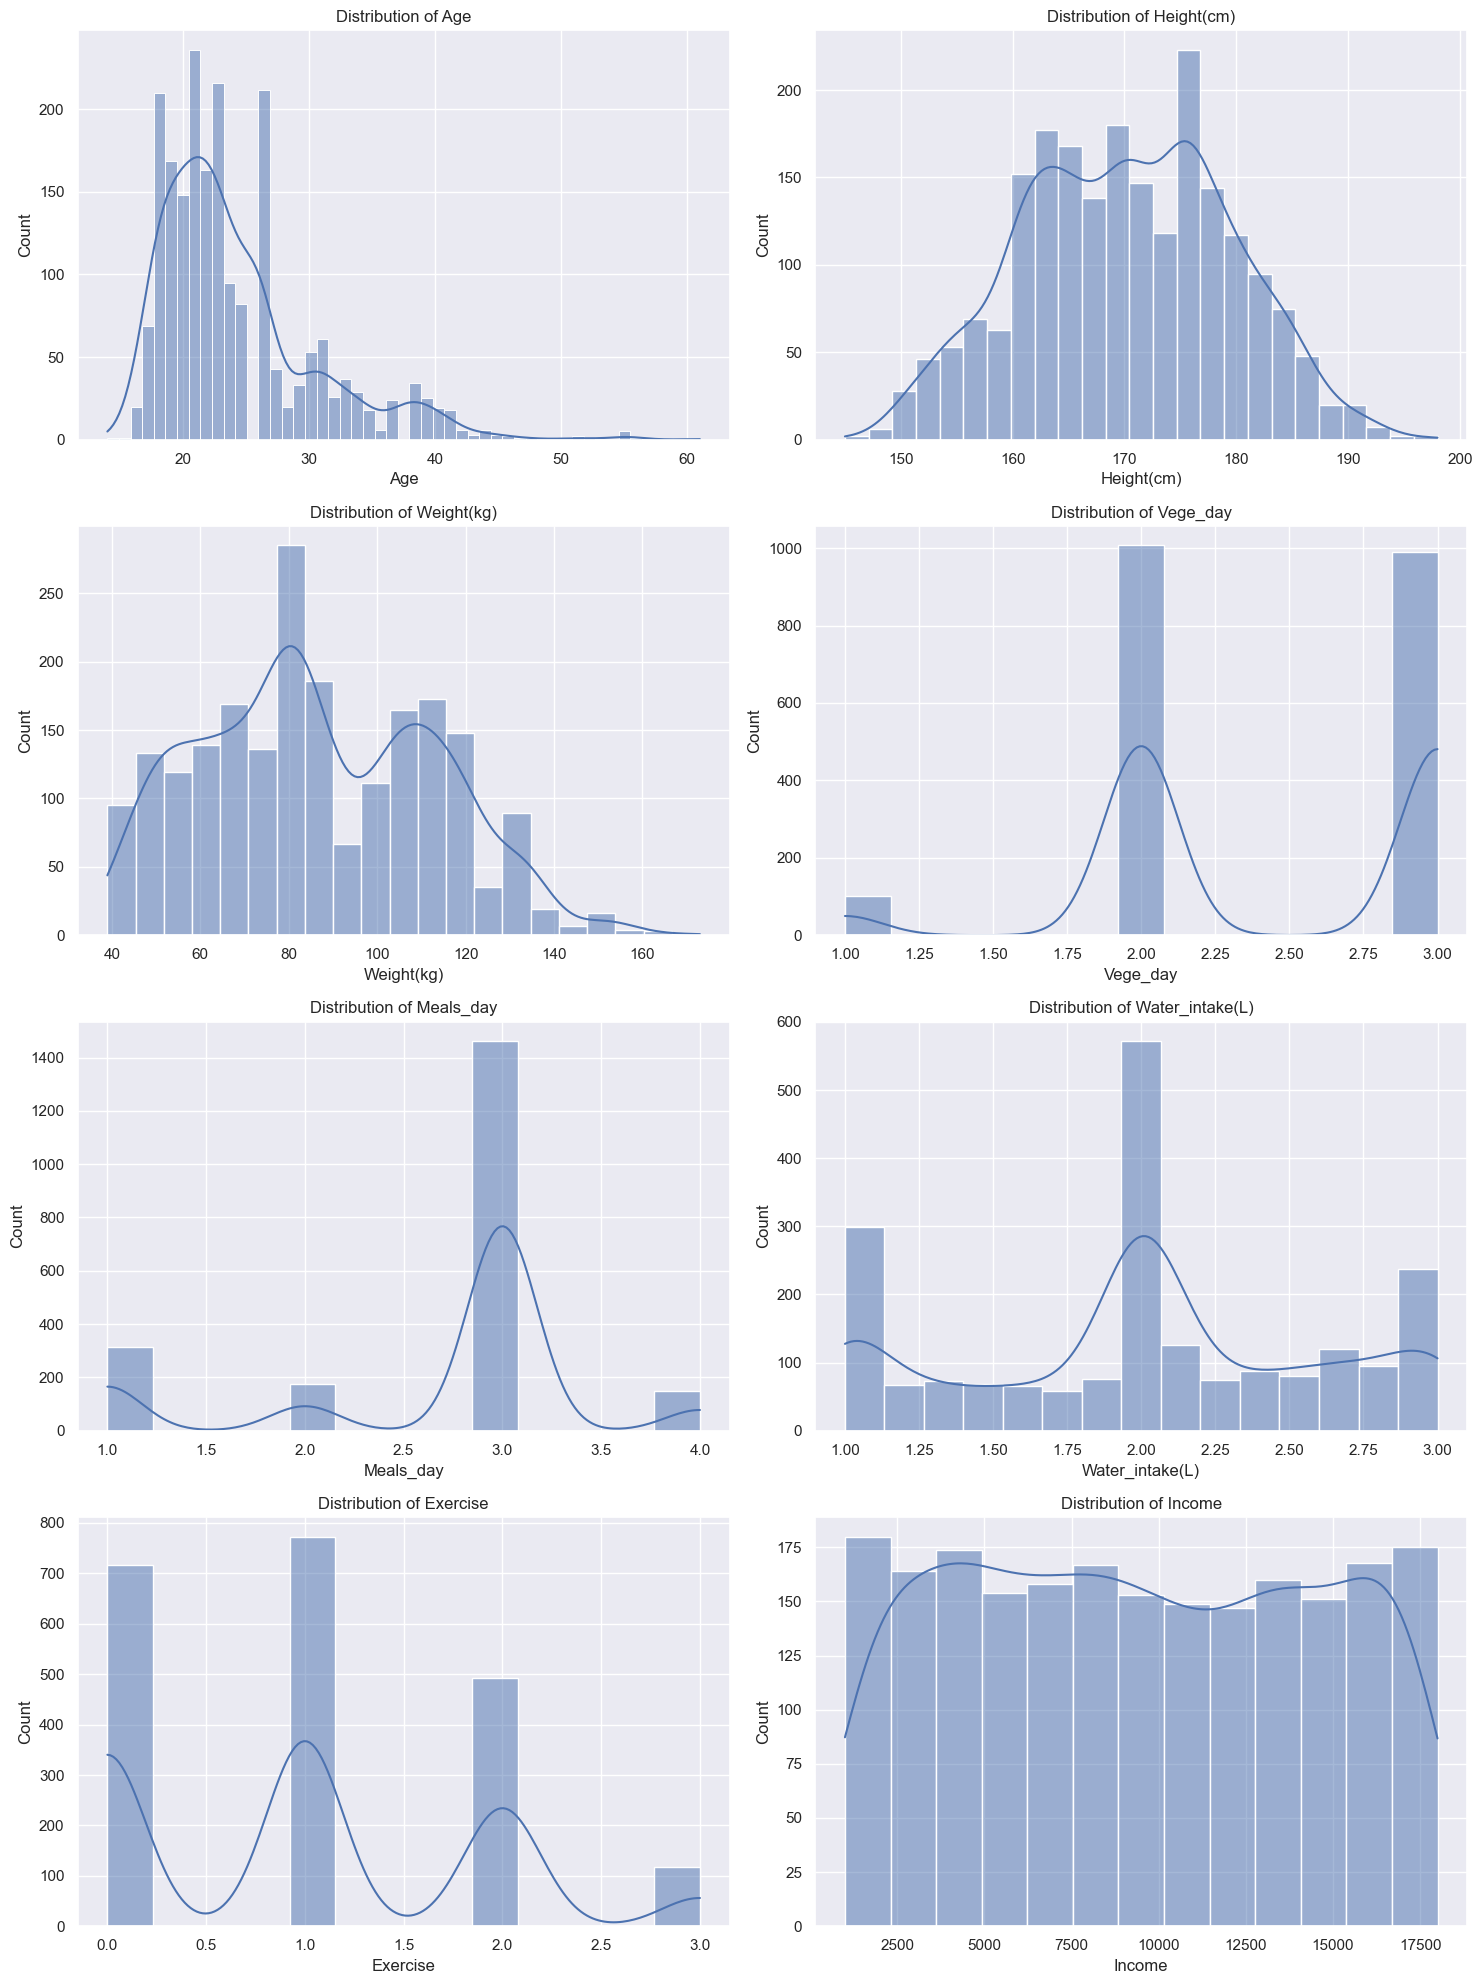

In [96]:
numerical_cols = ['Age', 'Height(cm)', 'Weight(kg)', 'Vege_day', 'Meals_day', 'Water_intake(L)', 'Exercise', 'Income']
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


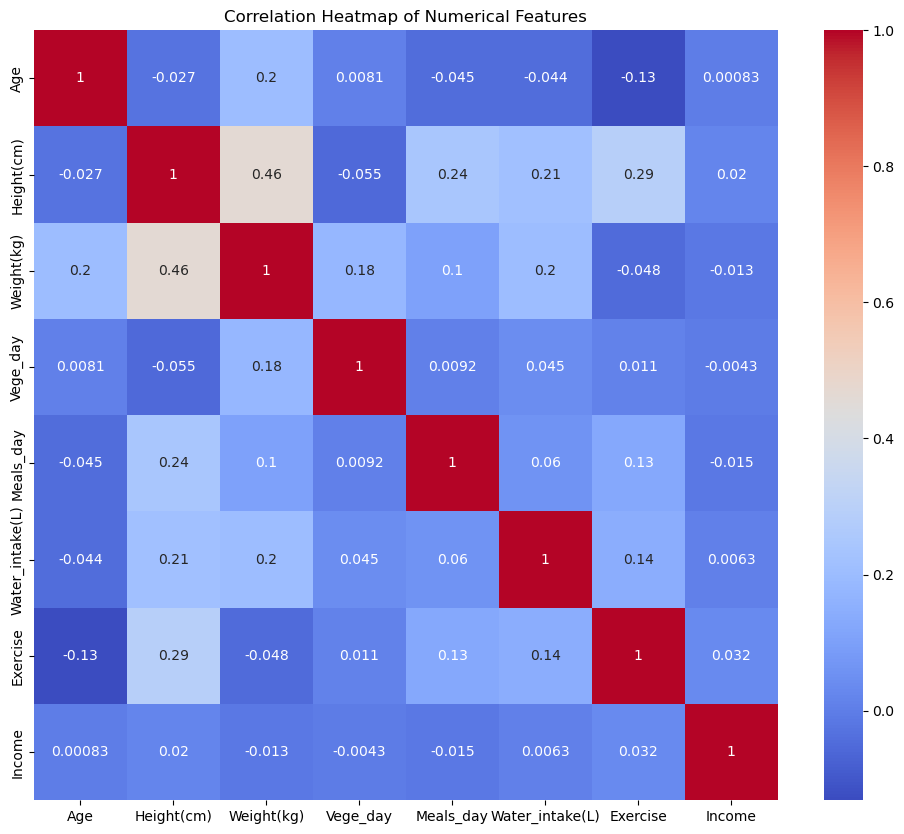

In [9]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



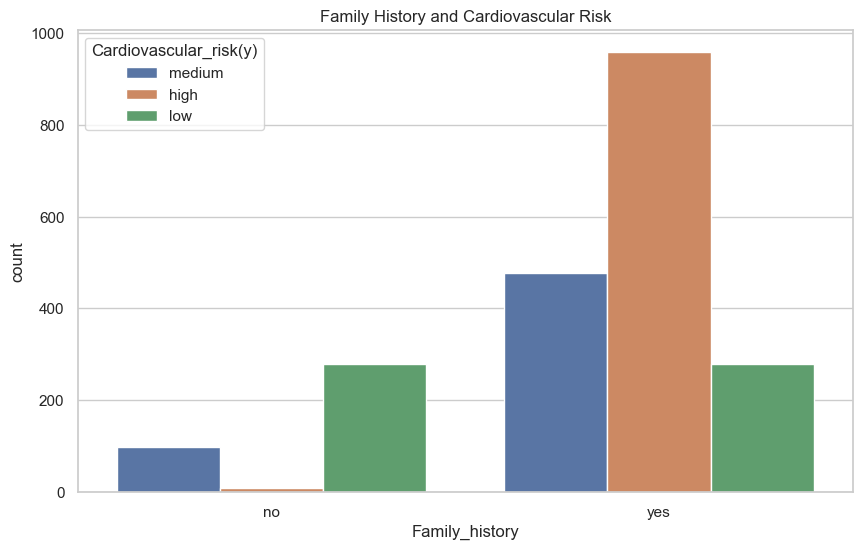

In [102]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='Family_history', hue='Cardiovascular_risk(y)', data=df)
plt.title('Family History and Cardiovascular Risk')
plt.show()


Data pre-processing

In [98]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Cardiovascular_risk(y)', axis=1)
y = df['Cardiovascular_risk(y)']

# Define numeric and categorical columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# split the input matrix into numerical and categorical attributes
categorical_columns = ['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline']

X_train_num = X_train.drop(columns=categorical_columns, axis=1)
X_train_cat = X_train[categorical_columns] 

scaler = StandardScaler(copy = False)
scaler.fit(X_train_num)       
X_train_num_tr = scaler.transform(X_train_num)

ohe = OneHotEncoder(sparse_output=False)
X_train_cat_tr = ohe.fit_transform(X_train_cat)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# combine the transformed numerical and categorical sets
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_tr])
y_train = y_train.values;  #convert to numpy array
print('X_train_tr shape:', X_train_tr.shape)
print('y_train shape:', y_train.shape)

X_train_tr shape: (1680, 34)
y_train shape: (1680,)


Model selection: LogisticRegression, KNeighborsClassifier and DecisionTreeClassifier

Model training and validation

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define models
models = {
    'log_reg': LogisticRegression(random_state=42),
    'knn_cla': KNeighborsClassifier(),  # Default is 5 neighbors
    'tree_cla': DecisionTreeClassifier(random_state=42)
}

# Function to show 10 random results
def show10results(y_true, y_pred):
    print('Result for 10 random samples:')
    selected = np.random.randint(0, len(y_true), 10)
    for i in selected:
        print(f'actual = {y_true[i]:7.0f}, pred = {y_pred[i]:7.0f}')

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_tr, y_train_encoded)
    
    # Predict on the training set
    y_pred_encoded = model.predict(X_train_tr)
    
    print(f'\n{name}')
    
    # Show the result of 10 random samples
    show10results(y_train_encoded, y_pred_encoded)

    # Compute and show the accuracy on the training set
    accuracy = accuracy_score(y_train_encoded, y_pred_encoded)
    print('Accuracy on training set =', accuracy)

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train_tr, y_train_encoded, cv=5)
    print('Cross-validation scores:', cv_scores)
    print('Mean CV score:', cv_scores.mean())



log_reg
Result for 10 random samples:
actual =       2, pred =       2
actual =       2, pred =       2
actual =       0, pred =       0
actual =       0, pred =       0
actual =       2, pred =       2
actual =       0, pred =       0
actual =       0, pred =       0
actual =       1, pred =       1
actual =       0, pred =       0
actual =       0, pred =       0
Accuracy on training set = 0.9851190476190477
Cross-validation scores: [0.98214286 0.95833333 0.9702381  0.98214286 0.9702381 ]
Mean CV score: 0.9726190476190476

knn_cla
Result for 10 random samples:
actual =       1, pred =       2
actual =       1, pred =       1
actual =       0, pred =       0
actual =       0, pred =       0
actual =       0, pred =       0
actual =       1, pred =       2
actual =       2, pred =       2
actual =       2, pred =       2
actual =       0, pred =       0
actual =       0, pred =       0
Accuracy on training set = 0.8988095238095238
Cross-validation scores: [0.86607143 0.86904762 0.8244

Model tuning and testing

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the models and their parameter grids
models = {
    'log_reg': {
        'model': LogisticRegression(random_state=42),
        'param_grid': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    'knn_cla': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'tree_cla': {
        'model': DecisionTreeClassifier(random_state=42),
        'param_grid': {
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

# Transform test data using the same scaler and encoder
X_test_num_tr = scaler.transform(X_test.drop(columns=categorical_columns, axis=1))
X_test_cat_tr = ohe.transform(X_test[categorical_columns])
X_test_tr = np.hstack([X_test_num_tr, X_test_cat_tr])
y_test_encoded = le.transform(y_test)

# Perform grid search for each model
for name, model_info in models.items():
    print(f"\nPerforming grid search for {name}...")
    
    grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_tr, y_train_encoded)
    
    print(f"Best parameters for {name}:")
    print(grid_search.best_params_)
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    # Save the best model
    models[name]['best_model'] = grid_search.best_estimator_
    
    # Evaluate on the test set
    y_pred = models[name]['best_model'].predict(X_test_tr)
    test_accuracy = accuracy_score(y_test_encoded, y_pred)
    models[name]['test_accuracy'] = test_accuracy
    print(f"Test set accuracy: {test_accuracy:.4f}")

# Find the overall best model
best_model_name = max(models, key=lambda name: models[name]['test_accuracy'])
best_model = models[best_model_name]['best_model']

print(f"\nOverall best model: {best_model_name}")
print(f"Best model parameters: {best_model.get_params()}")
print(f"Best model test accuracy: {models[best_model_name]['test_accuracy']:.4f}")



Performing grid search for log_reg...
Best parameters for log_reg:
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9911
Test set accuracy: 0.9810

Performing grid search for knn_cla...
Best parameters for knn_cla:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.8857
Test set accuracy: 0.9167

Performing grid search for tree_cla...
Best parameters for tree_cla:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation score: 0.9649
Test set accuracy: 0.9571

Overall best model: log_reg
Best model parameters: {'C': 100, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best model test accuracy: 0.9810
